In [90]:
import sys
import numpy as np
import scipy as sp
from scipy import signal
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%matplotlib notebook

# Import data reader module

In [91]:
# import script
sys.path.append("../keras/Data reader/")
import Data_set_creator as data 

# Functions

In [92]:
def normal(x, x_mean, std):
    return np.exp(-0.5*(x-x_mean)**2 / std**2) / np.sqrt(2*np.pi*std**2)

# Read timeseries experimental data

In [212]:
particle = 24
dt = 10**(-4)


#data_dir = "../Data/Experimental data/Synthetic Particles (IAC, 21)/"

data_dir = "../Data/Experimental data/algas e leveduras/"

In [213]:
targets, xdata, ydata, zdata = data.xyz_data(data_dir, particle)
print(len(xdata))

1516000


<IPython.core.display.Javascript object>


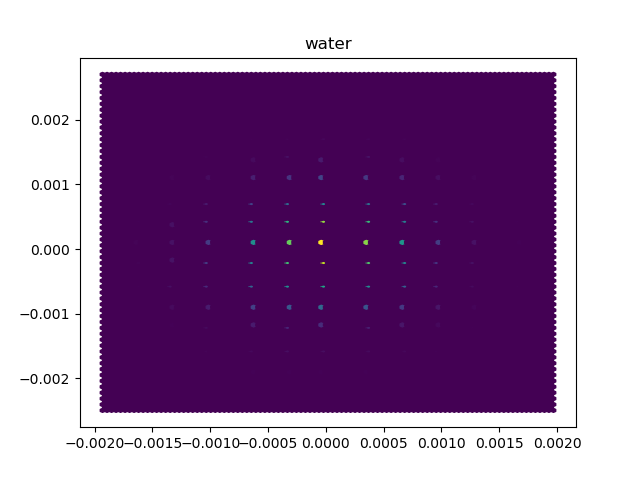

In [214]:
l = int(75000)

plt.figure(1)
plt.title(targets)
plt.hexbin(xdata[:l]-np.mean(xdata[:l]), ydata[:l]-np.mean(ydata[:l]))

# Choices

# Using full data estimate mean and variance

In [7]:
x_mean = np.mean(xdata[:])
x_standard_deviation = np.sqrt(np.var(xdata[:]))

print(x_mean)
print(x_standard_deviation)

0.03522402539682542
0.007789563982635142


In [8]:
x = np.linspace(np.min(xdata), np.max(xdata), 1000)

# Difference between the integral of the histogram and the estimated distribution

In [27]:
T = len(xdata)
print(len(xdata))
plt.figure(1)
hist, bins, patches = plt.hist(xdata[:T], 200, density=True)
plt.plot(x, normal(x, x_mean, x_standard_deviation))
plt.grid()

bins = (bins[1::]+bins[:-1])/2

print(np.sum(hist*(bins[1]-bins[0])))
print(np.sum(normal(x, x_mean, x_standard_deviation) * (x[1]-x[0])))


1512000
1.0000000000000009
0.9999977178229914


# Characteristic times of the OT

In [28]:
def Lorentzian(f, D, fc):
    return D / ((np.pi**2)* (fc**2 + f**2))

In [88]:
# calculate power spectral density
freqs, psd = sp.signal.welch(xdata, 1/dt, nperseg=T)

f = np.linspace(np.min(freqs), np.max(freqs), 10000)

f_cut = 2*np.pi/(10000*dt)

f_cut = f_cut

# fit psd to expected lorentzian function
p, cov = sp.optimize.curve_fit(Lorentzian, freqs[freqs>=f_cut], psd[freqs>=f_cut], bounds=([0., 0.],[np.inf, np.inf]))
cov = [cov[i,i] for i in range(len(cov))]

print(p)
print(cov)

[1.06114751e-01 1.37504091e+02]
[1.8865459637174329e-07, 0.13156133972592773]


<IPython.core.display.Javascript object>


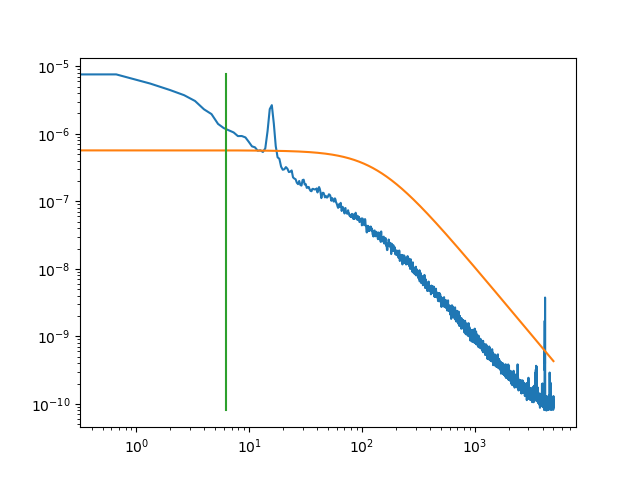

In [89]:
freqs, psd = sp.signal.welch(xdata, 1/dt, nperseg=T/100)

plt.figure(2)
plt.plot(freqs, psd)
plt.plot(f, Lorentzian(f, p[0], p[1]))
plt.plot(np.array([f_cut, f_cut]), np.array([np.min(psd), np.max(psd)]))
plt.xscale("log")
plt.yscale("log")

In [ ]:
T = np.array(2500, 5000,10000, 50000, 75000)
integrals = 


In [ ]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])

print(a[:,0])